In [212]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
os.chdir(r'C:\Users\admin\Desktop\Kaggle_competition\Project_2')
os.listdir()

['Bank Customer Churn Prediction.csv',
 'bankkk-checkpoint.ipynb',
 'bankkk.ipynb']

In [4]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [11]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 11)

In [9]:
# I am going to set the customer id as index
df.set_index('customer_id',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [17]:
obj=df.select_dtypes(include='object').columns # columns which are of text datatypes
num=df.select_dtypes(exclude='object').columns # columns which are of int datatypes

In [18]:
obj,num

(Index(['country', 'gender'], dtype='object'),
 Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
        'credit_card', 'active_member', 'estimated_salary', 'churn'],
       dtype='object'))

## Missing values

In [20]:
df.isna().sum() # we have no missing values

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Ouliers treatment

In [22]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
credit_score,10000.0,650.528800,96.653299,350.00,432.0000,452.0000,468.0000,479.0000,489.0000,521.00,584.00,652.000,718.0000,778.000,812.0000,825.0000,838.0000,850.0000,850.0000,850.00
age,10000.0,38.921800,10.487806,18.00,21.0000,22.0000,23.0000,24.0000,25.0000,27.00,32.00,37.000,44.0000,53.000,60.0000,62.0000,64.0000,67.0000,72.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,0.0000,0.0000,0.0000,0.0000,1.0000,1.00,3.00,5.000,7.0000,9.000,9.0000,10.0000,10.0000,10.0000,10.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,97198.540,127644.2400,149244.792,162711.6690,166530.5560,170826.7573,176915.6732,185967.9854,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.0000,1.0000,1.0000,1.0000,1.0000,1.00,1.00,1.000,2.0000,2.000,2.0000,2.0000,3.0000,3.0000,3.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,1.000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,1.000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,1842.8253,3769.4488,5811.2985,8064.7776,9851.8185,20273.58,51002.11,100193.915,149388.2475,179674.704,190155.3755,192146.9512,194231.0630,196278.5228,198069.7345,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.000,0.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00


In [23]:
# we can see outlier rs with the help of boxplot

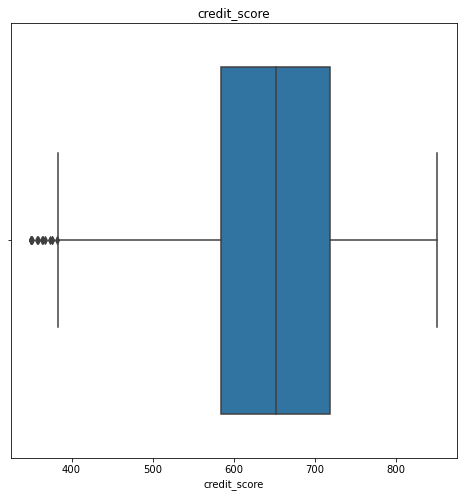

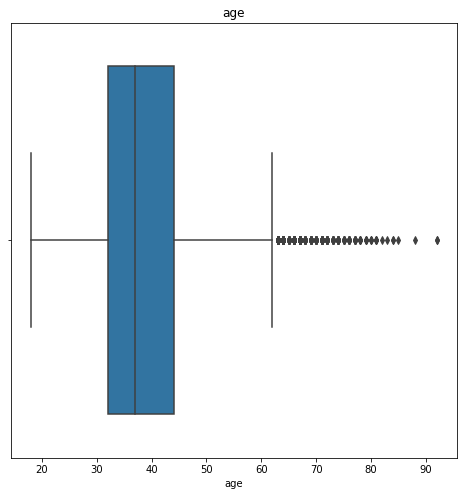

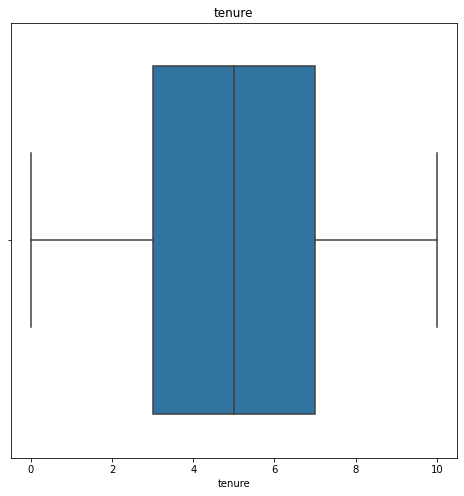

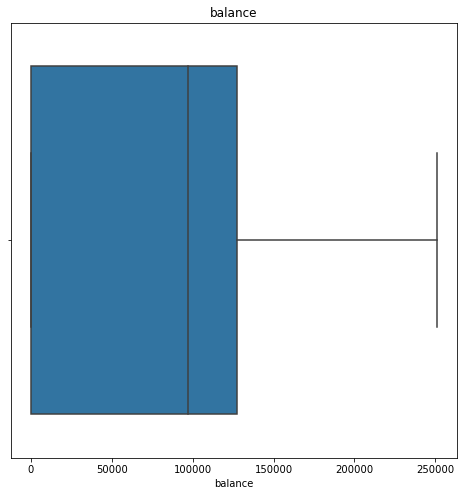

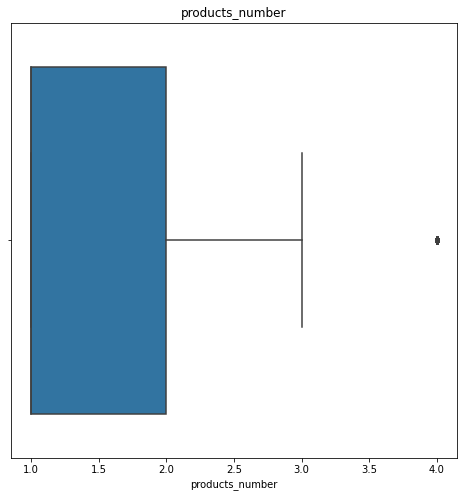

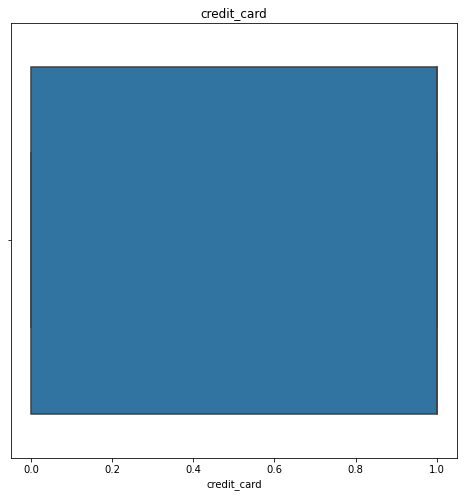

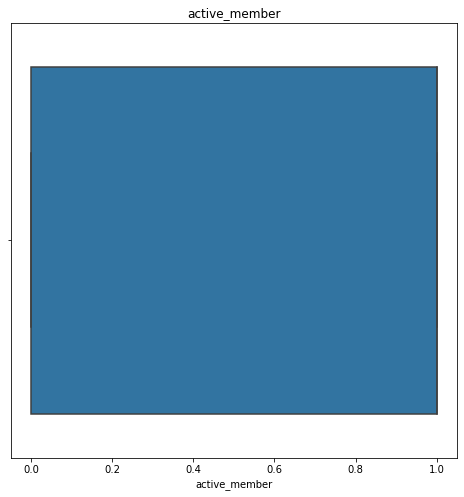

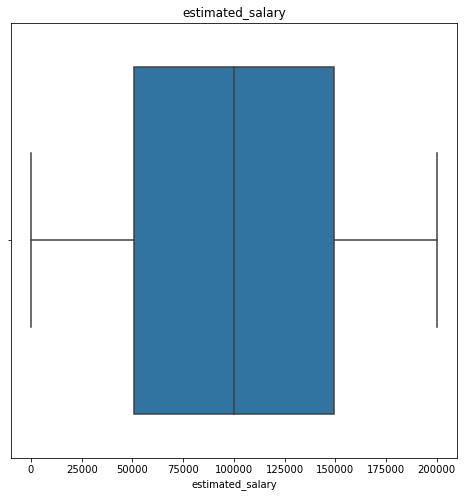

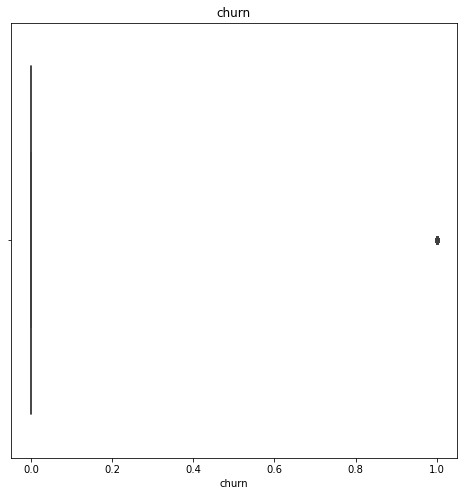

In [28]:
for i in num:
    plt.figure(figsize=(8,8))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [34]:
upper_outliers=['age']
down_outliers=['credit_score']

In [39]:
num

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [41]:
df['age']=np.where(df['age']>72,72,df['age'])
df['credit_score']=np.where(df['credit_score']<432,432,df['credit_score'])

In [42]:
## Univariate Analysis

In [43]:
obj

Index(['country', 'gender'], dtype='object')

<AxesSubplot:>

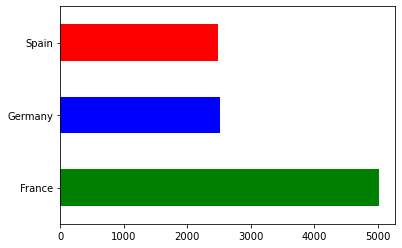

In [46]:
df['country'].value_counts().plot(kind='barh',color=['green','blue','red'])

<AxesSubplot:>

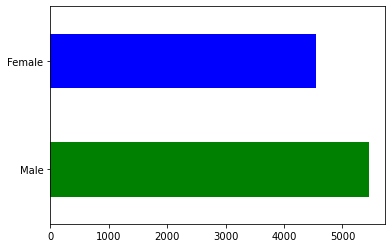

In [47]:
df['gender'].value_counts().plot(kind='barh',color=['green','blue','red'])

In [48]:
## Categorical-Categorical analysis

In [56]:
xx=pd.crosstab(df['country'],df['gender'])
xx

gender,Female,Male
country,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [66]:
s=stats.chi2_contingency(xx)
if s[1]>0.5:
    print('Features are not associated')
else:
    print('Features are associated')

Features are associated


In [67]:
# Num-Num

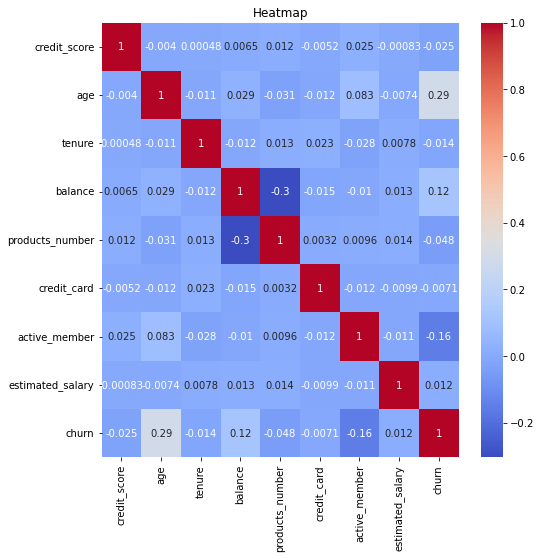

In [69]:
a=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(a,annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [70]:
## we cant see no multicollinearity from this heatmap

In [71]:
num

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [72]:
# we can also see the coorelation through scatter plot

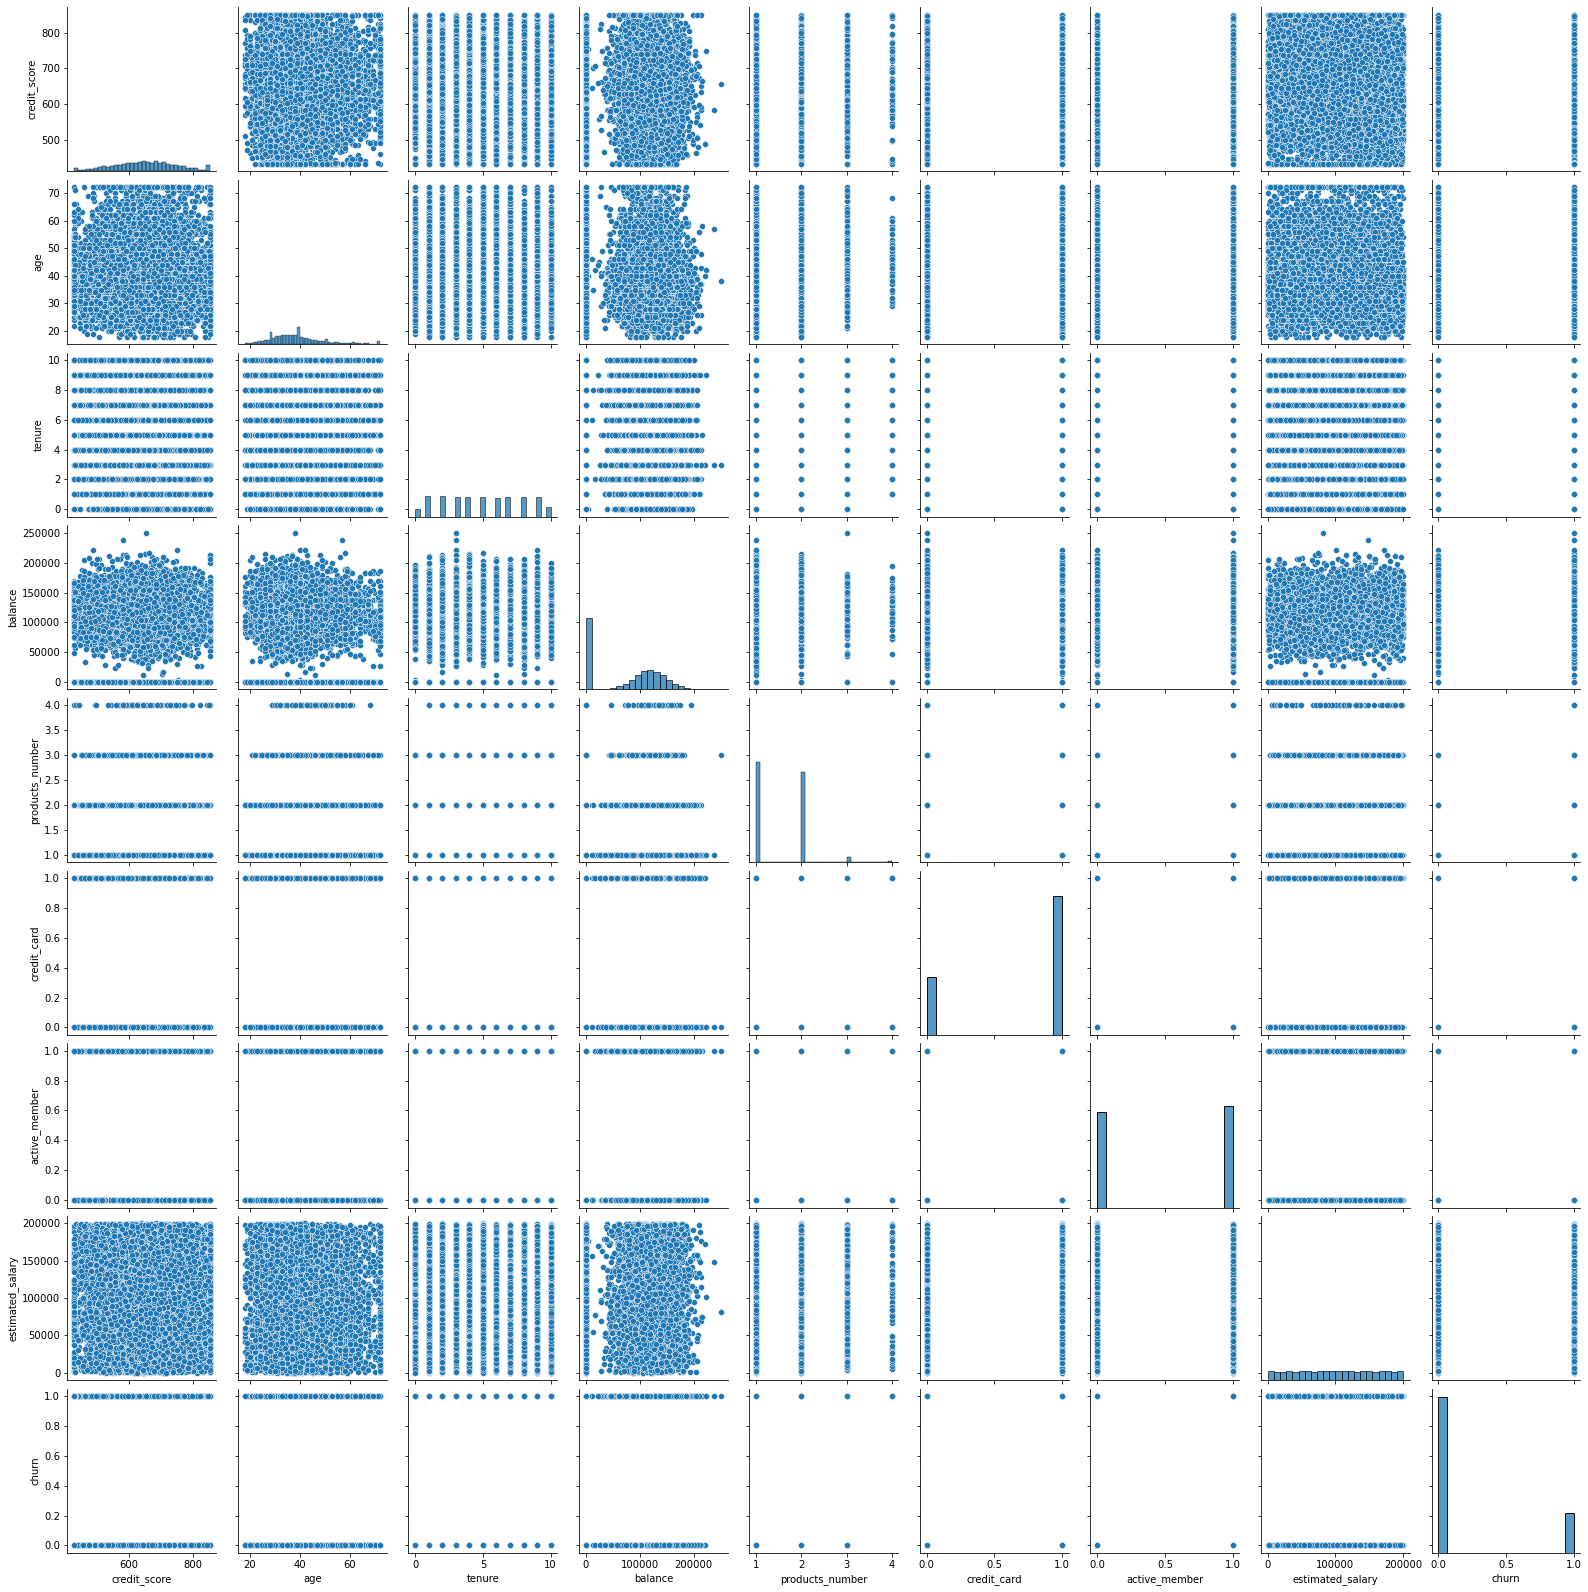

In [74]:
sns.pairplot(df)
plt.show()

In [77]:
ll=LabelEncoder() # now we have 
for i in obj:
    df[i]=ll.fit_transform(df[i])

In [80]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [83]:
df['churn'].value_counts() # Data is imbalanced

0    7963
1    2037
Name: churn, dtype: int64

In [85]:
x=df.drop('churn',axis=1)
y=df['churn']

## Feature selection through RandomForest

In [87]:
rf=RandomForestClassifier()

In [88]:
rf.fit(x,y)

RandomForestClassifier()

In [93]:
values=rf.feature_importances_
names=rf.feature_names_in_
features=pd.DataFrame({'name':names,'values':values}).sort_values(by='values',ascending=False)

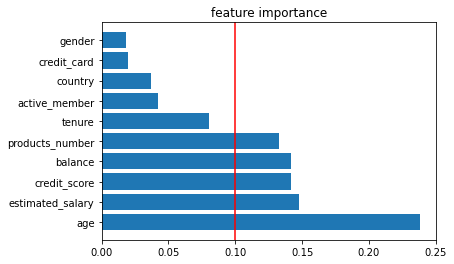

In [99]:
meann=features['values'].mean()
plt.barh(features['name'],features['values'])
plt.axvline(meann,color='red')
plt.title('feature importance')
plt.show()

In [100]:
## Conclusion - from this we can generalise that age feature is contributing maximum to the target variable

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [104]:
print(y_train.value_counts()) # we can see that data is not balanced so we are going the oversampling and use SMOTE to handle

0    5948
1    1552
Name: churn, dtype: int64


In [206]:
sm=SMOTE()
x_sm_train,y_sm_train=sm.fit_resample(x_train,y_train)
x_sm_test,y_sm_test=sm.fit_resample(x_test,y_test)

In [108]:
from collections import Counter
print(Counter(y_sm)) # data is balanced , we can also 

Counter({0: 5948, 1: 5948})


In [ ]:
## making a function 

## Logisgtic regression

In [120]:
ll=LogisticRegression()
ll.fit(x_train,y_train)
print(f'training dataset accuracy is {ll.score(x_train,y_train)}')
y_pred=ll.predict(x_train)

training dataset accuracy is 0.7884


In [129]:
def metrics(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    print(f'training dataset accuracy is {model.score(x_train,y_train)}')
    print(f'validation dataset accuracy is {model.score(x_test,y_test)}')
    y_pred=model.predict(x_train)
    print(confusion_matrix(y_train,y_pred))
    print(classification_report(y_train,y_pred))

In [130]:
ll=LogisticRegression()
metrics(ll,x_train,y_train,x_test,y_test)

training dataset accuracy is 0.7884
validation dataset accuracy is 0.792
[[5794  154]
 [1433  119]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5948
           1       0.44      0.08      0.13      1552

    accuracy                           0.79      7500
   macro avg       0.62      0.53      0.50      7500
weighted avg       0.73      0.79      0.72      7500



### Decision-Tree = This algorythm is based pn CART (Classification and Regression Technique)

### GridSearchCV

In [139]:
dt=DecisionTreeClassifier()
params={'max_depth':[4,5,7,10],'criterion':['gini','entropy'],'min_samples_split':[100,250,300,500],'min_samples_leaf':[150,200,250,300]}
gd=GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='accuracy',n_jobs=-1)

In [140]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, 10],
                         'min_samples_leaf': [150, 200, 250, 300],
                         'min_samples_split': [100, 250, 300, 500]},
             scoring='accuracy')

In [142]:
gd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=150,
                       min_samples_split=100)

In [143]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=150,min_samples_split=100)

In [146]:
metrics(dt,x_train,y_train,x_test,y_test)

training dataset accuracy is 0.8344
validation dataset accuracy is 0.8372
[[5732  216]
 [1026  526]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5948
           1       0.71      0.34      0.46      1552

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.82      0.83      0.81      7500



In [149]:
fn=x_train.columns
cn=[0,1]

In [154]:
#from sklearn import tree
#dt1=DecisionTreeClassifier()
#dt1.fit(x_train,y_train)
#tree.plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
#plt.show()

### RandomForest

In [160]:
dt=RandomForestClassifier()
params={'n_estimators':[100,150,200],'max_depth':[4,5,7],'criterion':['gini','entropy'],'min_samples_split':[100,250,300],'min_samples_leaf':[150,200,250]}

In [161]:
gd1=GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='accuracy',n_jobs=-1)
gd1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7],
                         'min_samples_leaf': [150, 200, 250],
                         'min_samples_split': [100, 250, 300],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [162]:
gd1.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=150, min_samples_split=300,
                       n_estimators=150)

In [163]:
rf=RandomForestClassifier(max_depth=7, min_samples_leaf=150, min_samples_split=300,n_estimators=150)
metrics(rf,x_train,y_train,x_test,y_test)

training dataset accuracy is 0.8370666666666666
validation dataset accuracy is 0.8452
[[5837  111]
 [1111  441]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5948
           1       0.80      0.28      0.42      1552

    accuracy                           0.84      7500
   macro avg       0.82      0.63      0.66      7500
weighted avg       0.83      0.84      0.80      7500



## Adaboost

In [167]:
params={'n_estimators':[50,70,100],'learning_rate':[1.0,0.1,0.5]}
ad=AdaBoostClassifier()

In [168]:
gd2=GridSearchCV(estimator=ad,param_grid=params,cv=5,scoring='accuracy',n_jobs=-1)
gd2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.5],
                         'n_estimators': [50, 70, 100]},
             scoring='accuracy')

In [170]:
gd2.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [173]:
ad=AdaBoostClassifier()
metrics(ad,x_train,y_train,x_test,y_test)

training dataset accuracy is 0.8556
validation dataset accuracy is 0.854
[[5680  268]
 [ 815  737]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5948
           1       0.73      0.47      0.58      1552

    accuracy                           0.86      7500
   macro avg       0.80      0.71      0.74      7500
weighted avg       0.85      0.86      0.84      7500



## XG Boost

In [ ]:
# Before applying KNN we have to standardize our data because it includes findiing the euclideon distance

## Sacling of our data

In [196]:
# Standard Scaler
ss=StandardScaler()
x_train_sm=ss.fit_transform(x_train)
x_test_sm=ss.fit_transform(x_test)

In [197]:
# MinMaxScaler
mm=MinMaxScaler()
x_train_mm=mm.fit_transform(x_train)
x_test_mm=mm.fit_transform(x_test)

## KNN

In [200]:
aa=list(range(2,20,2))
accurcy=[]
for i in aa:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sm,y_train)
    accurcy.append(knn.score(x_train_sm,y_train))

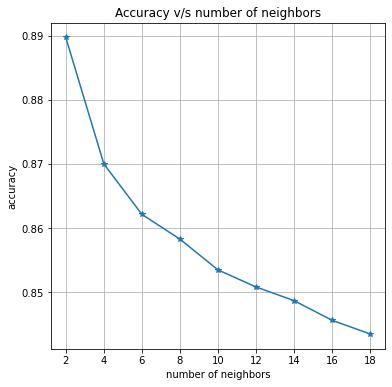

In [201]:
plt.figure(figsize=(6,6))
plt.plot(aa,accurcy,marker='*')
plt.title('Accuracy v/s number of neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [183]:
# from this graph we are going to take the number of neighbors equal to 4

In [202]:
knn=KNeighborsClassifier(n_neighbors=4)
metrics(knn,x_train_sm,y_train,x_test_sm,y_test)

training dataset accuracy is 0.87
validation dataset accuracy is 0.8388
[[5855   93]
 [ 882  670]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5948
           1       0.88      0.43      0.58      1552

    accuracy                           0.87      7500
   macro avg       0.87      0.71      0.75      7500
weighted avg       0.87      0.87      0.85      7500



## Support Vector Machine

In [203]:
sv=SVC(C=1.0,kernel='rbf') 
metrics(sv,x_train_sm,y_train,x_test_sm,y_test)

training dataset accuracy is 0.8630666666666666
validation dataset accuracy is 0.8596
[[5835  113]
 [ 914  638]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5948
           1       0.85      0.41      0.55      1552

    accuracy                           0.86      7500
   macro avg       0.86      0.70      0.74      7500
weighted avg       0.86      0.86      0.84      7500



## Naive-bayes

In [205]:
mb=MultinomialNB(alpha=1.0)
metrics(mb,x_train_mm,y_train,x_test_mm,y_test)

training dataset accuracy is 0.7930666666666667
validation dataset accuracy is 0.806
[[5948    0]
 [1552    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5948
           1       0.00      0.00      0.00      1552

    accuracy                           0.79      7500
   macro avg       0.40      0.50      0.44      7500
weighted avg       0.63      0.79      0.70      7500



In [209]:
# MinMaxScaler
mm=MinMaxScaler()
x_train_mm_mm=mm.fit_transform(x_sm_train)
x_test_mm_mm=mm.fit_transform(x_sm_test)

In [211]:
mb=MultinomialNB(alpha=1.0)
metrics(mb,x_train_mm_mm,y_sm_train,x_test_mm_mm,y_sm_test)

training dataset accuracy is 0.7327673167451244
validation dataset accuracy is 0.741439205955335
[[4466 1482]
 [1697 4251]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      5948
           1       0.74      0.71      0.73      5948

    accuracy                           0.73     11896
   macro avg       0.73      0.73      0.73     11896
weighted avg       0.73      0.73      0.73     11896



## PCA - Principal Component Analysis

In [222]:
pp=PCA()
pp.fit_transform(x_train)
#aa=sorted(pp.explained_variance_
cc=np.array(pp.explained_variance_)
dd=cc.cumsum()
dd
print(pp.feature_names_in_)
dd

['credit_score' 'country' 'gender' 'age' 'tenure' 'balance'
 'products_number' 'credit_card' 'active_member' 'estimated_salary']


array([3.86953727e+09, 7.18893839e+09, 7.18894762e+09, 7.18894773e+09,
       7.18894774e+09, 7.18894774e+09, 7.18894774e+09, 7.18894774e+09,
       7.18894774e+09, 7.18894774e+09])